# Problemas avançados: velocidade terminal no salto de paraquedas

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

O modelo físico que descreve a velocidade de um paraquedista levando-se em conta a força de atrito é dado pela equação:

$$\frac{d v}{d t} = a  - b v$$

Note que se $b = 0$, tem-se que se $d v/ d t = a$, onde $a$ é a aceleração. O termo $- b v$ descreve um fator de desaceleração proporcional a velocidade. Assumindo-se que $v(0) = v_0$, a solução analítica deste problema é:

$$v(t) = \frac{a}{b}\left(1 - e^{-b t}\right) + v_0 e^{-b t}$$

Quando $t\rightarrow \infty$, encontra-se a chamada velocidade terminal de queda $v_{term} = a/b$. A discretização da equação diferencial acima usando a derivada progressiva torna-se:

$$\frac{d v}{d t} \approx \frac{v(t+\Delta t)-v(t)}{\Delta t}$$

$$v(t+\Delta) \approx a\Delta t + v(t)(1 - b \Delta t)$$

Generalizando-se a expressão acima para qualquer instante $t_i$, obtem=se:

$$v_{i+1} = a \Delta t + v_i(1 - b\Delta t)$$


## Código com vetorização


### Carregando bibliotecas e definição prévia de funções

In [25]:
# -----------------------------------------
# Carregando bibliotecas numérica e gráfica
# -----------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# função para calcular a solução exata
# -----------------------------------------
def fveloc(t,a,b,v0):
    return (a/b)*(1-np.exp(-b*t))+b*v0*np.exp(-b*t)

# -----------------------------------------
# função para calcular a solução numérica
# -----------------------------------------
def fveloc_disc(t,a,b,v0):
    
    # esta função recebe um vetor contendo todos os instantes de tempo t_i do problema
    # e determina o tamanho deste vetor
    nt = len(t)
    
    # calcula o passo dt assumindo que o vetor dos instantes é uniforme
    dt = t[1] - t[0]
    
    #cria um veotr de velocidades com o mesmo tamanho da lista contendo os instantes t_
    v = np.zeros(nt)
    
    # preenche a condição inicial da velocidade v[0] = v0
    v[0] = v0

    # a partir da equação discretizada, calcula os valores da velocidade v_i nos instantes t_i
    for i in range(1,nt): v[i] = a*dt + v[i-1]*(1-b*dt)
    return v

### Parte principal do programa

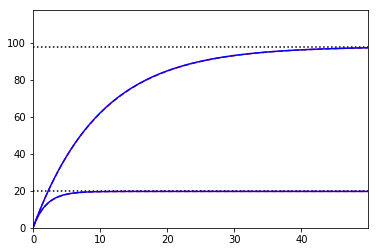

In [34]:
# -----------------------------------------
# inicialização de variáveis
# -----------------------------------------

dt = 0.1          # time step increment
nt = 500          # number of time steps
a  = 9.81         # acceleration
v0 = 0            # v(0)
b1  = 0.1
b2  = 0.5


Tmax = (nt-1)*dt  # this is not an input variable
                  # it only calculates the total time 
    
# -----------------------------------------
# lista para armazenar t e N(t)
# -----------------------------------------

# cria lista dos t_i com Nt elementos todos inicialmente zerados
time = np.linspace(0, Tmax, nt)

# para b1
v_theory_b1 = fveloc(time,a,b1,v0)   # vecolicdade teórica
v_term_b1 = np.ones(nt)*(a/b)        # velocidade terminal
v_num_b1 = fveloc_disc(time,a,b1,v0) # velocidade numérica

# para b2
v_theory_b2 = fveloc(time,a,b2,v0)   # vecolicdade teórica
v_term_b2 = np.ones(nt)*(a/b2)        # velocidade terminal
v_num_b2 = fveloc_disc(time,a,b2,v0) # velocidade numérica

# -----------------------------------------
# plotagem dos resultados numérico e teórico
# -----------------------------------------
    
plt.plot(time,v_theory_b1,'r--',
         time,v_term_b1,'k:',
         time,v_num_b1,'b',
         time,v_theory_b2,'r--',
         time,v_term_b2,'k:',
         time,v_num_b2,'b',
        )
plt.axis([0, Tmax, -0.1, 1.2*max(a/b1,a/b2)])
plt.show()

## Sugestões de estudo

* Escreva um código para plotar o erro $\Delta_i =  |N_{num}(t_i) - N_{teo}(t_i)|$ e determine o erro integrado $\Delta_{tot} = \sum_i \Delta_i$
* Com o código acima, plote o gráfico $\Delta_{tot}~\times~\Delta t$.
* Os exemplos acima foram escritos usando-se a derivada numérica progressiva para aproximar a derivada contínua $d N/ d t$. Escreva um código para resolver o problema do decaimento radiativo utilizando a derivada numérica central.
* Compare o erro entre as duas aproximações de derivadas numéricas com um gráfico $\Delta_{tot}~\times~\Delta t$